# **Waze Project**
**The Power of Statistics**

1- Analyze the relationship between mean amount of rides and device type.  
2- Statistical analysis of ride data based on device type. In particular, know if there is a statistically significant difference in mean amount of rides between iPhone® users and Android™ users.
3- Conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of rides between iPhone users and Android users.


# **Data exploration and hypothesis testing**

<br/>

**The purpose** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How did computing descriptive statistics help you analyze your data?

* How did you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>





# **Data exploration and hypothesis testing**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

<br>
1. Does the device type have a relationship with the amount of rides? 

</br>

### **Task 1. Imports and data loading**




Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Before you begin, recall the following Python packages and functions:

*Main functions*: stats.ttest_ind(a, b, equal_var)

*Other functions*: mean()

*Packages*: pandas, stats.scipy

</details>

In [19]:
# Import any relevant packages or libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [20]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Analyze and Construct**



Descriptive statistics can help you understand the characteristics, patterns, and trends of your data, as well as compare different groups or variables. One of the main benefits of using descriptive statistics is that they can simplify and organize large amounts of data into a few numbers or graphs. This can make it easier to grasp the main features and patterns of your data, as well as identify any outliers or errors. Descriptive statistics can also help you compare different groups or variables within your data. We can detect outliers by computing the distribution of the data points. 


### **Task 2. Data exploration**

Use descriptive statistics to conduct exploratory data analysis (EDA).

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

In order to perform this analysis, you must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.  It assigns this label back to the variable `device_new`.

**Note:** Creating a new variable is ideal so that you don't overwrite original data.



1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['column']
```

|column |
|  :-:       |
| A     |
| B     |
| A     |
| B     |

```
map_dictionary = {'A': 2, 'B': 1}
df['column'] = df['column'].map(map_dictionary)
df['column']
```

|column |
|  :-: |
| 2    |
| 1    |
| 2    |
| 1    |


## Data distribution

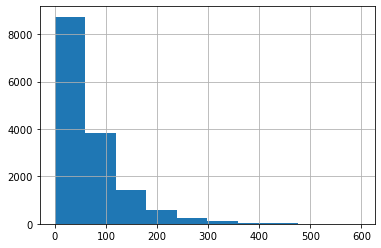

In [21]:
df['drives'].hist()

In [22]:
mean_df=df['drives'].mean()
std_df=df['drives'].std()

In [23]:
#One std
lowerlimit=mean_df-1*std_df
upperlimit=mean_df+1*std_df
((df['drives']>=lowerlimit) & (df['drives']<= upperlimit)).mean()*100

84.81232082138808

In [24]:
#Two std
lowerlimit=mean_df-2*std_df
upperlimit=mean_df+2*std_df
((df['drives']>=lowerlimit) & (df['drives']<= upperlimit)).mean()*100

94.91299419961331

In [25]:
#Three std
lowerlimit=mean_df-3*std_df
upperlimit=mean_df+3*std_df
((df['drives']>=lowerlimit) & (df['drives']<= upperlimit)).mean()*100

98.16654443629575

The data do not follow the normal distribution or the empirical rule

In [26]:
df['zdrives']=stats.zscore(df['drives'])

In [27]:
#Now filter the rows with +3 and -3
((df['zdrives']>3) & (df['zdrives']<-3)).sum()

0

In [28]:
map_dictionary = {'iPhone': 1, 'Android': 2}
df['device_new'] = df['device'].map(map_dictionary)
df[['device','device_new']].head()

,device,device_new
0,Android,2
1,iPhone,1
2,Android,2
3,iPhone,1
4,Android,2


You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [29]:
#The average number of drives per device type:
df_grouped=df.groupby('device').mean('drives')
df_grouped['drives']

device
Android    66.231838
iPhone     67.859078
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.


### **Task 3. Hypothesis testing**

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

Recall the difference between the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$).

**Question:** What are your hypotheses for this data project?

Null Hypothesis: The device type do not affect the average drives for a user
<br>
Alternative Hypothesis: The device type do affect the average drives for a user
</br>

Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [32]:
# 1. Isolate the `drives` column for iPhone users.
iphone_df=df[df['device_new']==1]['drives']

# 2. Isolate the `drives` column for Android users.
andriod_df=df[df['device_new']==2]['drives']
# 3. Perform the t-test
stats.ttest_ind(a=iphone_df, b=andriod_df, equal_var=False)

Ttest_indResult(statistic=1.4635232068852353, pvalue=0.1433519726802059)

Based on the p-value you got above which is 0.14, for our 5% significance level, since the p-value (0.143) is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean drives of users between the two data groups (iphone, andriod) is different.